# **Sheet Music Converter - Project Stage 3**

Link to shared project folder needed in the My Drive folder:<br> https://drive.google.com/drive/folders/1Cxxx-5RC2a_BzPahWJ7BzO85ZEDtrSQS?usp=sharing


# **Problem Statement**

The problem is for musicians practicing alone it may be difficult to understand how a certain part of music is supposed to sound. Our algorithm will enable musicians to feed in pictures of their sheet music to our algorithm and hear the music played. Ideally, we hope our solution will ease the process of learning for novice musicians trying to pick up an instrument.

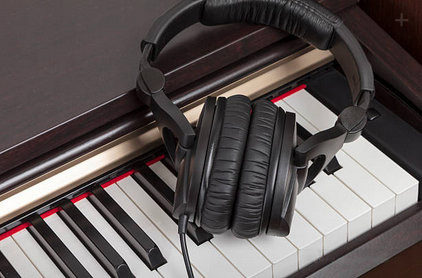

# **Approach**

We devised an algorithm that utilizes optical music recognition to read sheet music and extract the key features from the music like key signature, note length, and pitch. The algorithm takes these features to read the notes on the sheet music and creates a MIDI file that produces an audio file that can be played by the user. Our algorithm was implemented in Python using Py 3.6.7, TensorFlow, Numpy, Matplotlib, and OpenCV. 

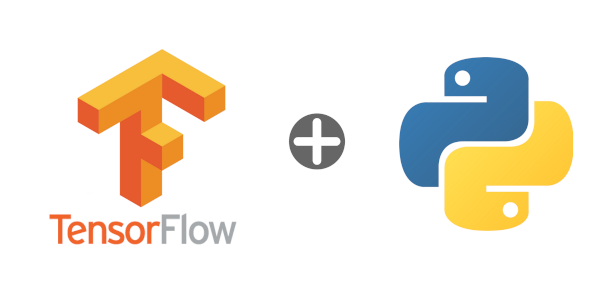

# **Data**

Let's first mount to Drive so we can begin working with our data.

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

drive = '/content/drive/My Drive/CVGroupProject'

Mounted at /content/drive


Now, let's take a look at our data.

Ground Truth
['clef-G2', 'keySignature-DbM', 'timeSignature-4/4', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-Db5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Gb5_eighth', 'note-F5_eighth', 'barline']


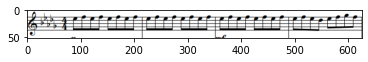

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

#Image
ex0 = imread(drive + "/Testing/0.png")
imshow(ex0)

#Ground Truth
truths = []
with open(drive + "/Testing/groundTruth.txt") as f:
    examples = f.readlines()
    for e in examples:
      #Split string into individual elements
      stripE = e.rstrip()
      splitE = stripE.split(" ")
      truths.append(splitE)
print("Ground Truth")
print(truths[0])

Ground Truth
['clef-G2', 'keySignature-AM', 'timeSignature-4/4', 'note-E5_quarter.', 'note-E5_eighth', 'note-E5_eighth', 'note-C#6_eighth', 'note-B5_eighth', 'note-E6_eighth', 'barline', 'note-A5_quarter.', 'note-A5_eighth', 'note-A5_eighth', 'note-G#5_eighth', 'note-E5_eighth', 'note-A5-eighth', 'barline', 'note-G#5_quarter.', 'note-F#5_eighth', 'note-F#5_half', 'barline', 'note-F#5_half', 'barline']


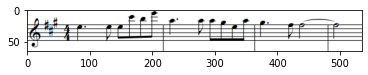

In [ ]:
#Image
ex1 = imread(drive + "/Testing/1.png")
imshow(ex1)
print("Ground Truth")
print(truths[1])

&nbsp;

The images consist of sections of digital sheet music. The entire image is fed into the model, and the model identifies key signature, time signature, notes, rests, pitches, and durations. We are restricting our dataset to monophonic (notes are not played simultaneously) sheets for this project as the model we use was trained to be proficient at breaking down this type of music.

&nbsp;

---

&nbsp;

To test the performance of the model, we created a few manually labeled test examples that will be tested on the model in the model testing section. Ground truth for a specific example corresponds to the line in the txt file. Truths follow the sequential order of the sheet music and should match the sequential output of the model.



# **Model**

To implement our algorithm, we use a pre-trained model that can take a sample of sheet music and translate that to an agnostic and semantic model. The semantic file holds information that is purposeful to the model's accuracy. This can include key signature or a note's pitch. The agnostic file holds unneccesary information that the model may ignore such as bar lines. These files are then stored to text files that can be further interpreted.



Let's try testing the model on some of the data we've previously loaded.

# **Model Testing**

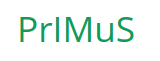

The corresponding code for prediction on the model was pulled from Calvo-Zaragoza's research [2].  However, the testing code is ours. We used the Primus data set to test the accuracy of the model [8]. In order to predict on the model, a command line with arguments including the image location and model location is used. 



Below is a comparison with a single example as well as the semantics that the model predicted printed as strings.

In [ ]:
!python '/content/drive/My Drive/CVGroupProject/util/ctc_predict.py' -image '/content/drive/My Drive/CVGroupProject/Testing/0.png' -model '/content/drive/My Drive/CVGroupProject/util/models/semantic-model/semantic_model.meta' -vocabulary '/content/drive/My Drive/CVGroupProject/util/Data/vocabulary_semantic.txt'

2021-04-15 02:12:39.868323: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-15 02:12:43.040664: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-15 02:12:43.068665: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-15 02:12:43.129593: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-15 02:12:43.129656: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ae33fd30ade5): /proc/driver/nvidia/version does not exist
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
2021-04-15 02:12:44.981671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimiz

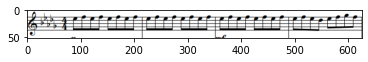

In [ ]:
imshow(ex0)

Above, we can see an image representation pulled from our data in the previous step that we are testing the model against. This phrase consits of largely eighth notes, is in the key of Db,  has a time signature of 4/4, and uses treble clef. The prediction outputs from the model can also be seen above, but let's formalize it a bit more by checking its accuracy against the real labels and see how it holds up.

In [ ]:
with open(drive + "/Testing/results.txt") as f:
  results = f.readlines()
  for r in results:
    stripR = r.rstrip()
    splitR = stripR.split(" ")

print(splitR)
print(truths[0])

import numpy as np
#Compare results with ground truth
correct = 0
resultsArray = np.array(splitR)
truthArray = np.array(truths[0])
for i in range(truthArray.shape[0]):
  if resultsArray[i] == truthArray[i]:
    correct += 1
print("Accuracy: {}/{},  {}%".format(correct, truthArray.shape[0], 100*correct/truthArray.shape[0]))

['clef-G2', 'keySignature-DbM', 'timeSignature-4/4', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-Db5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-G5_eighth', 'note-F5_eighth', 'barline']
['clef-G2', 'keySignature-DbM', 'timeSignature-4/4', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'barline', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-F5_eighth', 'note-Eb5_eighth', 'note-

Remarkably, the model yielded 97% accuracy when compared against a computer generated image of sheet music. The only error appears to be towards the tail end when the model predicted an eighth note that was a G, but it was instead an eighth note that was a Gb. 

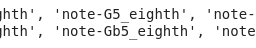

One question that can be raised is how well does the model perform on handwritten sheet music or photos taken of sheet music. This is one avenue that we may consider exploring.

#**Distorted Images**

As a test, we wanted to see how the model performs on some random distorted image. This sample was pulled from the Camera-Primus dataset, which distorts pictures to simulate cameras or imperfect digitization. 

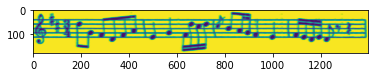

In [ ]:
#Image
ex2 = imread(drive + "/Testing/2.jpg")
imshow(ex2)

In [ ]:
!python '/content/drive/My Drive/CVGroupProject/util/ctc_predict.py' -image '/content/drive/My Drive/CVGroupProject/Testing/2.jpg' -model '/content/drive/My Drive/CVGroupProject/util/models/semantic-model/semantic_model.meta' -vocabulary '/content/drive/My Drive/CVGroupProject/util/Data/vocabulary_semantic.txt'

2021-04-15 02:25:18.504428: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-15 02:25:20.767219: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-15 02:25:20.768213: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-15 02:25:20.779062: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-15 02:25:20.779123: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ae33fd30ade5): /proc/driver/nvidia/version does not exist
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
2021-04-15 02:25:21.271152: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimiz

In [ ]:
with open(drive + "/Testing/results.txt") as f:
  results = f.readlines()
  for r in results:
    stripR = r.rstrip()
    splitR = stripR.split(" ")

print(splitR)
print(truths[2])

import numpy as np
#Compare results with ground truth
correct = 0
resultsArray = np.array(splitR)
truthArray = np.array(truths[2])
for i in range(truthArray.shape[0]):
  try: 
    if resultsArray[i] == truthArray[i]:
      correct += 1
  except:
    continue
print("Accuracy: {}/{},  {}%".format(correct, truthArray.shape[0], 100*correct/truthArray.shape[0]))

['clef-G2', 'keySignature-DM', 'timeSignature-3/4', 'note-D5_eighth', 'note-G4_eighth', 'note-F#4_eighth', 'note-D4_eighth', 'note-F#4_eighth', 'note-A4_eighth', 'barline', 'note-E4_quarter', 'note-G4_quarter', 'note-F#4_sixteenth', 'note-D5_sixteenth', 'note-C#5_sixteenth', 'note-D5_sixteenth', 'barline', 'gracenote-C#5_eighth', 'note-B4_eighth', 'note-A4_sixteenth', 'note-G4_sixteenth', 'note-F#4_quarter', 'note-E4_quarter', 'barline', 'note-F#4_sixteenth', 'note-E4_sixteenth', 'note-D4_sixteenth', 'note-E4_sixteenth', 'note-D4_eighth', 'rest-eighth', 'rest-quarter', 'barline']
['clef-G2', 'keySignature-DM', 'timeSignature-3/4', 'note-D5_eighth', 'note-G4_eighth', 'note-F#4_eighth', 'note-D4_eighth', 'note-F#4_eighth', 'note-A4_eighth', 'barline', 'note-E4_quarter', 'note-G4_quarter', 'note-F#4_sixteenth', 'note-D5_sixteenth', 'note-C#5_sixteenth', 'note-D5_sixteenth', 'barline', 'gracenote-C#5_eighth', 'note-B4_eighth', 'note-A4_sixteenth', 'note-G4_sixteenth', 'note-F#4_quarter', '

Suprisingly, the model performed exceptionally well even on the distorted music. Continuing on, we will explore the dataset of distorted images further to experiment on where the model performs poorly.

# **Model Improvement**

The prediction model generated by Calvo-Zaragoza and Rizo has high accuracy in converting images into musical semantics. However, that is where they stop and we will continue. In the coming weeks, we plan to use this semantic data and convert it into machine playable form, a MIDI file, in order to allow musicians to hear what a certain section of music should sound like. We hope that this improvement would help novice musicans accelerate their learning process and find learning more enjoyable.

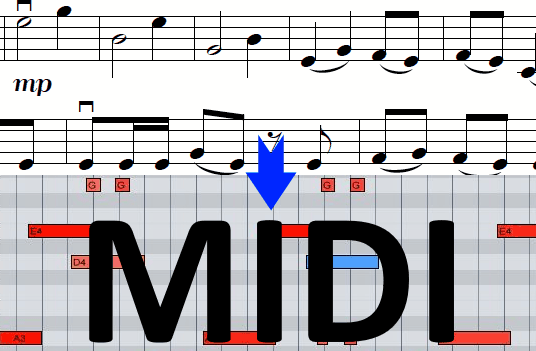

# **References**



[1] &emsp;Ashrafh, Ahmed, et al. “Aashrafh/Mozart.” GitHub, GitHub, 14 Dec. 2020, Retrieved from https://github.com/aashrafh/Mozart. 

&nbsp;

[2] &emsp;Calvo-Zaragoza J, Rizo D. End-to-End Neural Optical Music Recognition of Monophonic Scores. Applied Sciences. 2018; 8(4):606. https://doi.org/10.3390/app8040606

GitHub Repo: https://github.com/OMR-Research/tf-end-to-end

&nbsp;

[3] &emsp;Ebonko, Israel. “Play Sheet Music with Python, OpenCV, and an Optical Music Recognition Model.” Hearbeat, Fritz AI, 26 Aug. 2020, https://heartbeat.fritz.ai/play-sheet-music-with-python-opencv-and-an-optical-music-recognition-model-a55a3bea8fe. 

&nbsp;

[4] &emsp;Nyati, A. (2017). CadenCV: An Optical Music Recognition System With Audible Playback. Massachusetts Institute of Technology. Retrieved from https://firebasestorage.googleapis.com/v0/b/afika-nyati-website.appspot.com/o/design%2Fcadencv%2Fcadencv_afika_nyati.pdf?alt=media&token=a5aa2413-32c0-4bc7-8222-06342b822096 

GitHub Repo: https://github.com/afikanyati/cadenCV.

&nbsp;

[5] &emsp;Rebelo, A., Fujinaga, I., Paszkiewicz, F., Marcal, A., Guedes, C., & Cardoso, J. (2012). Optical music recognition: state-of-the-art and open issues. International Journal of Multimedia Information Retrieval, 1(3), 173–190. https://doi.org/10.1007/s13735-012-0004-6

Hyperlink: https://uncc.primo.exlibrisgroup.com/permalink/01UNCC_INST/1rqb8fi/cdi_crossref_primary_10_1007_s13735_012_0004_6

&nbsp;



[6] &emsp;Vo, Q., Vo, Q., Lee, G., Lee, G., Kim, S., Kim, S., Yang, H., & Yang, H. (2018). Recognition of Music Scores with Non-Linear Distortions in Mobile Devices. Multimedia Tools and Applications, 77(12), 15951–15969. https://doi.org/10.1007/s11042-017-5169-9

Hyperlink: https://uncc.primo.exlibrisgroup.com/permalink/01UNCC_INST/1rqb8fi/cdi_springer_primary_2017_11042_77_12_5169

&nbsp;


[7] &emsp;https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

&nbsp;

[8] &emsp;https://grfia.dlsi.ua.es/primus/




# **Image References**

[1]  &emsp;https://cdn.pianodreamers.com/wp-content/uploads/2017/07/headphones_digital-piano.jpg

&nbsp;

[2] &emsp;https://miro.medium.com/max/4320/1*E6jhcyx5k-18j5Aadq4FTg.png

&nbsp;

[3] &emsp;https://cdn.ilovefreesoftware.com/wp-content/uploads/2018/01/sheet-music-to-midi.png